# Taller 5 - Redes Neuronales y Random Forests

Este taller busca ser una primera experiencia aplicando distintos modelos de Redes Neuronales para la solución de un problema con muchos tipos de datos distintos. Ademas de diversos tipo de redes neuronales superficiales y profundas, probaremos el algoritmo "Random Forests" que suele obtener resultados cercanos al estado del arte en ciertos problemas.

En este notebook comenzaremos trabajando con un dataset disponible en la plataforma [Kaggle](https://www.kaggle.com/c/leaf-classification/overview/description). Se trata de un conjunto de imagenes y caracteristicas ("pre-extracted features") de hojas de 99 especies distintas de plantas, recolectadas por el laboratorio de los _Royal Botanic Gardens_ en Gran Bretaña.

A lo largo de todo el taller, dependeremos mucho de las herramientas del paquete Keras: Una libreria Python muy util, construida sobre una plataforma de machine learning muy "poderosa" llamada TensorFlow, de forma tal que simplifica mucho la creacion de modelos de redes neuronales. Keras y TensorFlow son actualmente desarrolladas y mantenidas por Google.

## Ejercicio 1 - Clasificacion de Hojas a partir de características relevadas

Comenzaremos trabajando sobre las características "pre-computadas" y provistas en el dataset que corresponden a valores relacionados a la forma, margen y textura de la hoja.

Comenzamos cargando las librerías:

In [33]:
# Cargamos las librerías necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical

Luego cargamos la tabla de datos, originalmente extraída de https://www.kaggle.com/c/leaf-classification/data.

In [2]:
!wget -O train.csv https://raw.githubusercontent.com/dherrera1911/talleres_aabc/master/data/leaves_train.csv

--2024-08-08 17:55:41--  https://raw.githubusercontent.com/dherrera1911/talleres_aabc/master/data/leaves_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1568525 (1.5M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   1.50M  --.-KB/s    in 0.09s   

2024-08-08 17:55:41 (16.7 MB/s) - ‘train.csv’ saved [1568525/1568525]



Luego cargamos los datos a la variable train

In [3]:
train = pd.read_csv('./train.csv')

print("Array de la forma: ", train.shape)

print("Hay ", train.isnull().any().sum(), " datos faltantes.")

print("Hay ", train["species"].nunique(), " especies unicas.")

train.head()

Array de la forma:  (990, 194)
Hay  0  datos faltantes.
Hay  99  especies unicas.


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [4]:
# Los datos de margen, forma y textura seran nuestra entrada
x = train.drop(['species','id'],axis=1)
# La especie nuestra salida, lo que queremos predecir
y = train['species']
# id de la imagen a la que corresponden los datos
ids = train['id']

Los datos precomputados son valores de forma y textura de las hojas y parecen tomar valores muy cercanos a 0, como hemos visto con ciertos modelos (particularmente con redes neuronales) conviene normalizar o estandarizar los datos de entrada. 

### Ej 1.1

Estandaricen los datos de entrada usando la funcion StandardScaler() de sklearn.

In [5]:
x = # COMPLETEN AQUI
print(x.shape, x.mean(), x.std())

SyntaxError: invalid syntax (3889353041.py, line 1)

Vemos que tenemos 192 caracteristicas de 990 muestras. Si se tratan de 99 especies, parece que tenemos un dataset perfectamente balanceado.

Verifiquemos la cantidad de especies:

In [6]:
y = LabelEncoder().fit(y).transform(y)
clases = list(LabelEncoder().fit(y).classes_)

len(clases)

99

Separen los datos en un conjunto de entrenamiento y otro de prueba usando train_test_split()

In [ ]:
x_train , x_test , y_train , y_test = # COMPLETEN AQUI

### Ej 1.2
Probemos utilizar un clasificador RandomForest sobre estos datos. Pueden usar el modelo de SKLearn: RandomForestClassifier.

Prueben variar parametros, describiendo los resultados obtenidos en los datos de entrenamiento y de validación.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = 10
random_f = # COMPLETEN AQUI
random_f.fit(x_train , y_train)

In [ ]:
pred_train = random_f.predict(x_train)
pred_test = random_f.predict(x_test)
# print(confusion_matrix(y_test,pred_test))
# plot_confusion_matrix(classifier, x_test, y_test)
print('Porcentaje de acierto sobre datos de entrenamiento: ', accuracy_score(y_train, pred_train))
print('Porcentaje de acierto sobre datos de validación: ', accuracy_score(y_test, pred_test))

### Ej 1.3

Luego de observar buenos resultados con el modelo de Random Forests, veamos si podemos replicarlos o mejorarlos con una red neuronal.

Debajo ven un ejemplo de una red "shallow" (llana), se consideran redes profundas mas o menos a partir de 5 capas.

Pueben variar la cantidad de capas, la cantidad de neuronas por capas, los tipos de funcion de activacion, etc.

In [ ]:
model = Sequential()
model.add(Dense(512,input_dim=192))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))
model.add(Dense(99))
model.add(Activation('softmax'))

In [ ]:
# La medida de error puede ser "categorical crossentropy" o "multiclass logloss"
# y tambien pueden probar con distinto optimizadores
model.compile(loss='categorical_crossentropy',optimizer='rmsprop')
model.summary()

Probar con 10 epocas, con 100 epocas, ¿que ocurre al variar esto?

Nota: observen que si no recompilamos el modelo, comienza a entrenar desde donde habia quedado!

¿Que podemos concluir sobre la dificultad del problema y/o los datos de validacion?

*Puede responder aquí*

In [ ]:
y_train_cat = to_categorical(y_train)
print(y_train_cat.shape)

## Entrenamos el modelo sobre los datos de entrenamiento
history = model.fit(x_train,y_train_cat,batch_size=32,epochs=10,verbose=True)

Podemos ver como fue el entenamiento graficando la loss a lo largo de las epocas (iteraciones).

In [ ]:
plt.plot(history.history['loss'],'o-')
plt.xlabel('Number of Iterations')
plt.ylabel('Categorical Crossentropy')
plt.title('Train Error vs Number of Iterations')

In [ ]:
y_test_cat = to_categorical(y_test)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
# print(confusion_matrix(y_test,np.argmax(pred_test, axis=1)))
print('Porcentaje de acierto sobre datos de entrenamiento: ', accuracy_score(y_train, np.argmax(pred_train, axis=1)))
print('Porcentaje de acierto sobre datos de validación: ', accuracy_score(y_test, np.argmax(pred_test, axis=1)))

## Ej 2 - Clasificación a partir de Imagenes

Pueden encontrar las imagenes de las hojas en [esta](https://drive.google.com/drive/folders/1gaBMaBPiUKTMH_qc6UIL5oUl72zzqT_W?usp=sharing) carpeta de drive, deben apretar en donde dice algo como "Add shortcut to My Drive" para poder acceder a la carpeta desde Colab.

Las imagenes de las hojas han sido preprocesada (aparentemente de forma similar al procidimiento que hicimos en el taller 4 con los globulos blancos) y son imagenes en Blanco y Negro. Esta simplificacion puede favorecer o no el rendimiento de las redes neuronales, ya que simplifican informacion que la red podria utilizar. Veremos...

Primero observemos algunas de las imagenes con las que contamos.



In [7]:
!wget -O leaves_images.zip https://github.com/dherrera1911/talleres_aabc/raw/master/data/leaves_images.zip
!unzip leaves_images.zip

--2024-08-08 17:56:17--  https://github.com/dherrera1911/talleres_aabc/raw/master/data/leaves_images.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dherrera1911/talleres_aabc/master/data/leaves_images.zip [following]
--2024-08-08 17:56:17--  https://raw.githubusercontent.com/dherrera1911/talleres_aabc/master/data/leaves_images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35447698 (34M) [application/zip]
Saving to: ‘leaves_images.zip’

leaves_images.zip   100%[===================>]  33.80M  33.1MB/s    in 1.0s    

2024-08-08 17:56:18 (33.1 MB/s) - ‘leaves_images.zip’ 

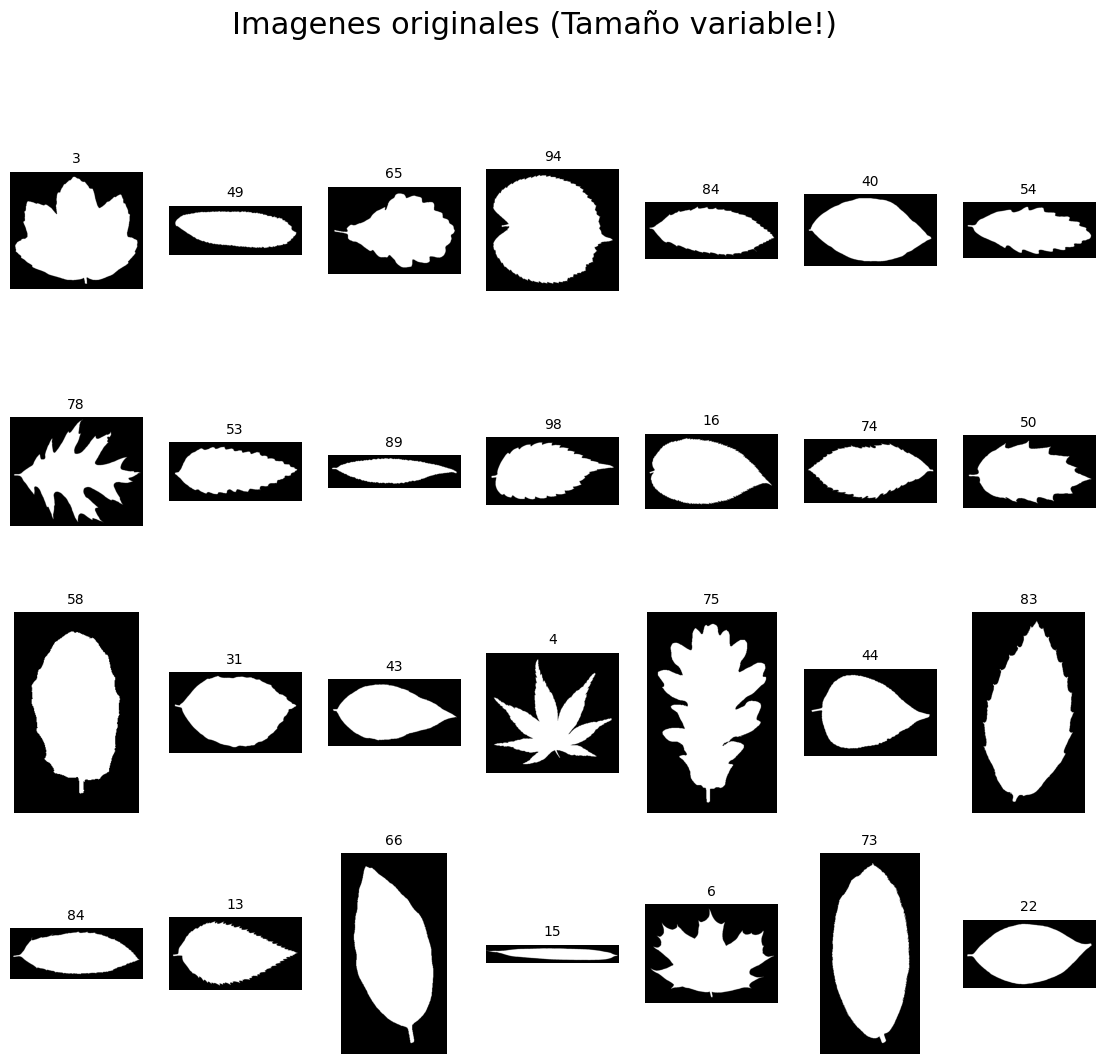

In [8]:
# Imprimir algunas imagenes aleatorias
plt.figure(figsize=(14,12))
plt.suptitle('Imagenes originales (Tamaño variable!)', fontsize=22)
img_path = './images/'
for k in range(28):
    ID = ids[k]
    img_filename = img_path + str(ID) + '.jpg'
    plt.subplot(4,7,k+1)
    plt.imshow(mpimg.imread(img_filename), cmap='gray')
    plt.title(y[k], fontsize=10)
    plt.axis('off')

Observamos que tienen tamanos variables, esto sera un problema para utilizarlas como input a la red neuronal, que necesita entradas de tamano constante. Por lo tanto nos queda un paso de pre procesamiento antes de poder usar las imagenes, tendremos que llevarlas todo al mismo tamaño.

Veamos algunos tamaños, para pensar que puede ser un buen tamaño comun para las imagenes

In [9]:
for k in range(8):
    indices_aleatorios = np.random.randint(len(ids))
    randomID = ids[indices_aleatorios]
    img_filename = img_path + str(randomID) + '.jpg'
    img = mpimg.imread(img_filename)
    print(img.shape)

(608, 205)
(442, 505)
(264, 792)
(364, 611)
(372, 657)
(806, 746)
(410, 832)
(646, 400)


Vemos que son todas relativamente grandes, sin embargo los rasgos son bastante caracteristicos y no parece necesario una imagen tan detallada. 400 pixeles es una imagen bastante grande para una red neuronal, pensemos en las imagenes del dataset CIFAR10 usadas en clase que eran de 32x32!

In [10]:
# Utilizamos este paquete especial para imagenes,
# con el fin de redimensionar las imagenes sin deformarlas.
# ESTO PUEDE DEMORAR UNOS MINUTOS
from PIL import Image
from keras.preprocessing.image import img_to_array

# Generaremos imagenes cuadradas de tamaño fijo
# con la imagen de la hoja centrada y a escala
size=200
data = []
for ID in ids:
    img = Image.open(img_path+str(ID)+".jpg")
    img.thumbnail((size,size))
    img_nueva = Image.new("1", (size,size), 0)
    img_nueva.paste(img, ( int((size - img.size[0]) / 2), int((size - img.size[1]) / 2) ))
    data.append(img_to_array(img_nueva))
np.array(data).shape

(990, 200, 200, 1)

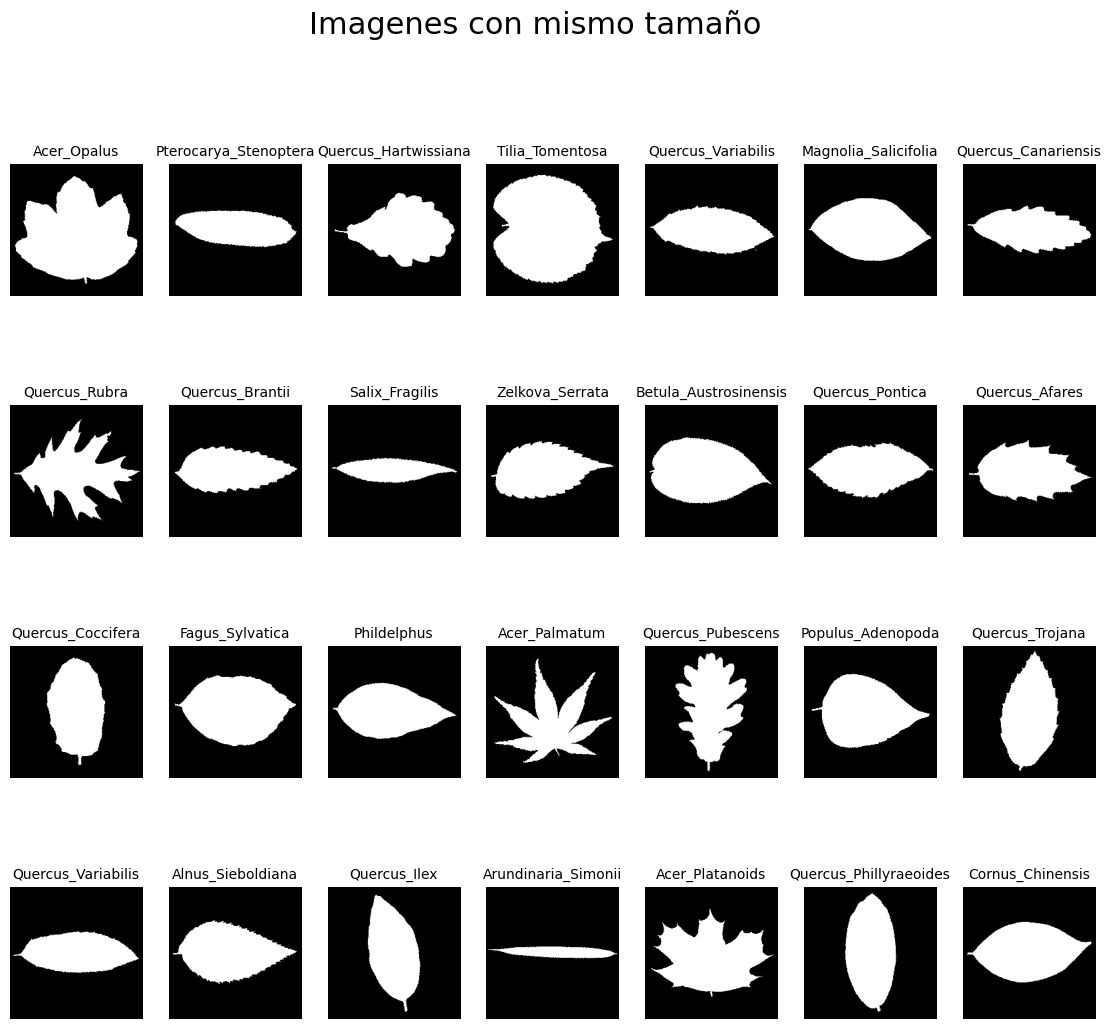

In [11]:
plt.figure(figsize=(14,12))
plt.suptitle('Imagenes con mismo tamaño', fontsize=22)
for k in range(28):
    plt.subplot(4,7,k+1)
    plt.imshow(data[k][:,:,0], cmap='gray')
    plt.title(train["species"][k], fontsize=10)
    plt.axis('off')

A hora estamos listos para usar estas imagenes de entrada, probemos con una red neuronal simple como la utilizada anteriormente.

Para entrar con una imagen a este modelo, que recibe un array, utilizaremos la capa "Flatten" que genera un solo vector de datos a partir de todas las filas de la imagen concatenadas.

In [12]:
x_train , x_test , y_train , y_test = train_test_split(np.array(data), y , test_size = 0.25 , random_state = 42)

In [13]:
model = Sequential()
model.add(Input(shape=(200,200,1)))
model.add(Flatten())
model.add(Dense(1024))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Activation('sigmoid'))
model.add(Dense(99))
model.add(Activation('softmax'))

In [14]:
# Veamos como se ve el modelo
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',  metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    40,961,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 99)             │        50,787 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 99)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,536,611 (158.45 MB)

 Trainable params: 41,536,611 (158.45 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# pasamos las etiquetas a one hot encoding
y_train_cat = to_categorical(y_train)
print(y_train_cat.shape)

# Entrenamos el modelo
history = model.fit(x_train,y_train_cat,batch_size=32,epochs=50,verbose=True)

(742, 99)
Epoch 1/2
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.1947 - loss: 2.9962
Epoch 2/2
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.1905 - loss: 3.0060


Podemos plotear la loss para ver como entrena a traves de las epocas, prueben de ponerlo a entrenar por mas epocas y vean cuando llega a un "tope".

Recuerden que si no recompilamos el modelo, comienza a entrenar desde donde habia quedado!

Text(0.5, 1.0, 'Error en entrenamiento vs Numero de iteraciones')

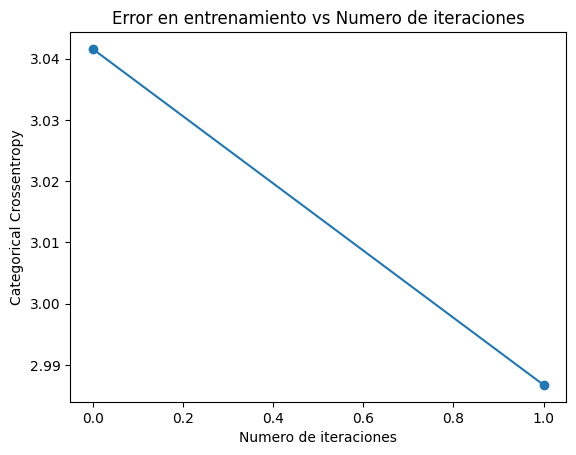

In [17]:
plt.plot(history.history['loss'],'o-')
plt.xlabel('Numero de iteraciones')
plt.ylabel('Categorical Crossentropy')
plt.title('Error en entrenamiento vs Numero de iteraciones')

In [18]:
y_test_cat = to_categorical(y_test)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
# print(confusion_matrix(y_test,np.argmax(pred_test, axis=1)))
print('Porcentaje de acierto sobre datos de entrenamiento: ', accuracy_score(y_train, np.argmax(pred_train, axis=1)))
print('Porcentaje de acierto sobre datos de validación: ', accuracy_score(y_test, np.argmax(pred_test, axis=1)))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Porcentaje de acierto sobre datos de entrenamiento:  0.1778975741239892
Porcentaje de acierto sobre datos de validación:  0.12903225806451613


¿Que podemos decir de este primer modelo sobre las imagenes de entrada? ¿Esto nos confirma alguna hipotesis que hayamos hecho sobre las caracteristicas pre-computadas del dataset?

¿Podemos cambiar algo del modelo para intentar mejorar el rendimiento? ¿Y de los datos?

_Puede responder aquí_



### Ej 2.2
 Procedamos a utilizar una red neuronal con capas convolutiva a ver si logramos mejorar el rendimiento.

Recordamos que las capas convolutivas son particularmente efectivas para imagenes, ya que por su diseno son buenas encontrando estructura espacial en los datos.

Prueben variar los parametros como ser la cantidad de neuronas por capa, el tamano de la convolucion, o de la capa de max-pooling.

*Si aun no lo hicieron, recuerden cambiar el entorno de ejecucion para que corra en el GPU.*

In [19]:
model = Sequential()
model.add(Input(shape=(200,200,1)))
model.add(Conv2D(32, (5,5)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (5,5)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16, (3,3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Activation('sigmoid'))
model.add(Dense(99))
model.add(Activation('softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 196, 196, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 98, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 94, 94, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     3,965,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 99)             │        50,787 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 99)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,047,315 (15.44 MB)

 Trainable params: 4,047,315 (15.44 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# pueden probar darle datos para la validacion al modelo,
# y el mismo dara resultados sobre estos datos al finalizar cada epoca
history = model.fit(x_train,y_train_cat,batch_size=32,epochs=40,verbose=True)

Epoch 1/2
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.0478 - loss: 4.5857
Epoch 2/2
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.3771 - loss: 2.8306


In [22]:
y_test_cat = to_categorical(y_test)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print('Porcentaje de acierto sobre datos de entrenamiento: ', accuracy_score(y_train, np.argmax(pred_train, axis=1)))
print('Porcentaje de acierto sobre datos de validación: ', accuracy_score(y_test, np.argmax(pred_test, axis=1)))

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Porcentaje de acierto sobre datos de entrenamiento:  0.6212938005390836
Porcentaje de acierto sobre datos de validación:  0.4032258064516129


No vemos una mejoria interesante sobre los datos de evaluacion aunque si sobre los de entrenamiento. ¿Donde podemos decir que es nuestro deficit entonces?

Hay un proceso interesante para cuando tenemos menos datos de los que quisieramos que se trata de **augmentar los datos**. Pero antes de pasar a eso, observemos la salida de algunas capas intermedias de la red neuronal a ver si nos da algo de informacion.

In [23]:
from keras.models import Model
# redefinimos un modelo que tiene la salida despues de cada capa convolucional
ixs = [1, 3]
outputs = [model.layers[i].output for i in ixs]
layers_model = Model(inputs=model.inputs, outputs=outputs)
layers_model.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 196, 196,  │        832 │ input_layer_1[0]… │
│                     │ 32)               │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 98, 98,    │          0 │ conv2d[1][0],     │
│ (MaxPooling2D)      │ 32)               │            │ conv2d[3][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 94, 94,    │     25,632 │ max_pooling2d[2]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 47, 47,    │          0 │ conv2d_1[1][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 26,464 (103.38 KB)

 Trainable params: 26,464 (103.38 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
i=6
# tenemos que expandir la dimension para que tenga la correcta para la red (1, size, size, 1)
test_img = np.expand_dims(x_train[4], axis=0)
# obtenemos los "feature map" de las capas
feature_maps = layers_model.predict(test_img)
len(feature_maps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


2

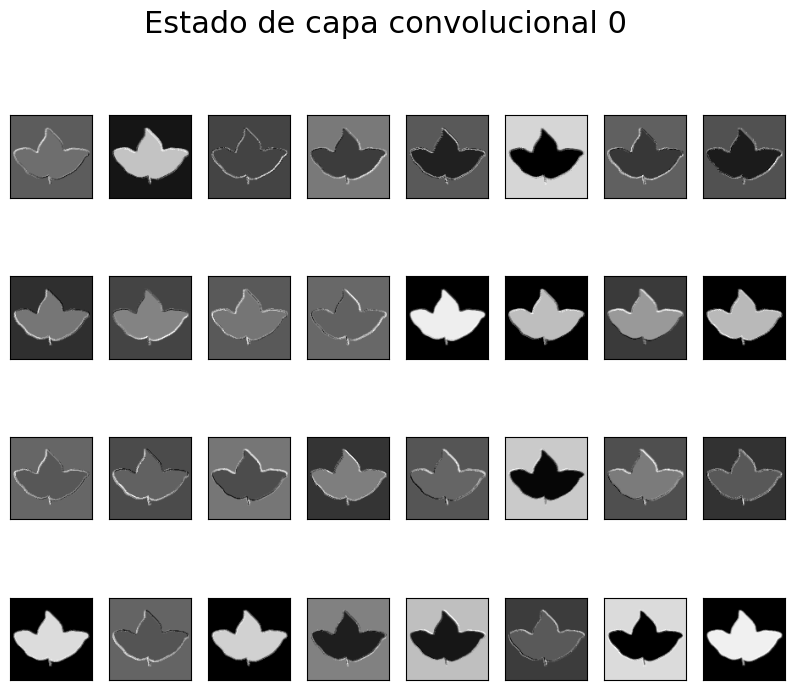

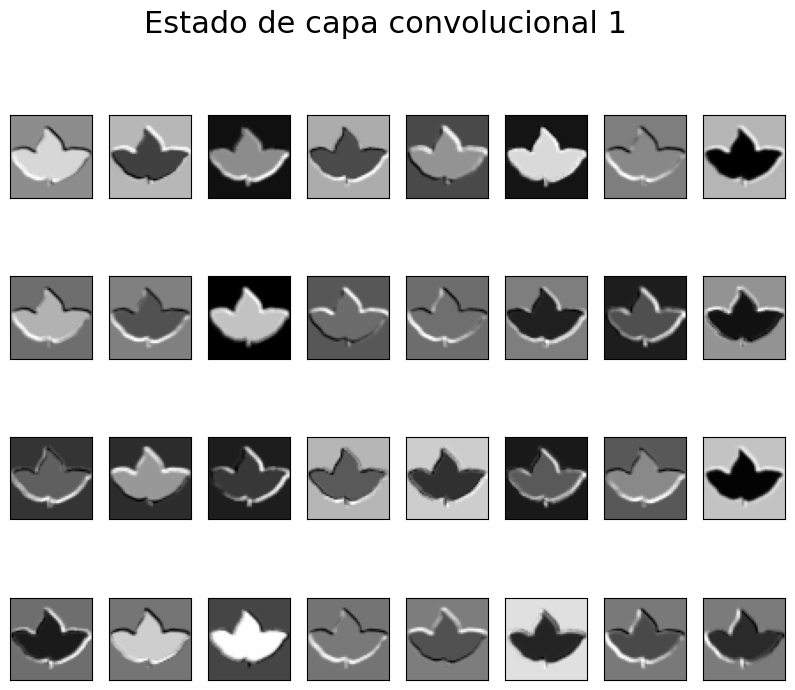

In [25]:
for i, fmap in enumerate(feature_maps):
  ix = 1
  plt.figure(figsize=(10, 8))
  plt.suptitle("Estado de capa convolucional " + str(i), fontsize=22)
  for _ in range(4):
    for _ in range(8):
      # specify subplot and turn of axis
      ax = plt.subplot(4, 8, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      # plot filter channel in grayscale
      plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
      ix += 1
  # show the figure
  plt.show()

¿Que observamos que estan "viendo" las capas?

### Ej 2.3 - Augmentación de datos

En muchas aplicaciones, no tenemos suficiente datos para obtener buenos resultados de una red neuronal. Para obtener independencia de los datos y hacer al modelo mas robusto, se puede hacer augmentacion de los datos que tengamos.

Probemos hacer augmentacion de las imagenes que tenemos, pero a la entrada del modelo mismo.

### Augmentación con layers de keras

Existen capas especiales que se pueden agregar y augmentan los datos a la entrada.

\+ info: https://www.tensorflow.org/tutorials/images/data_augmentation 

Describan que hacen las capas, porque tienen sentido en este caso (¿podria no ayudar realizar este tipo de augmentacion?) y pruebe variando los parametros o agregando otras,

In [26]:
from tensorflow.keras import layers

In [27]:
model = Sequential()
model.add(Input(shape=(200,200,1)))
model.add(layers.RandomFlip("horizontal"))
model.add(layers.RandomRotation(0.1))
model.add(Conv2D(64, (5,5)))
model.add(BatchNormalization())
model.add(Conv2D(32, (5,5)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (5,5)))
model.add(BatchNormalization())
model.add(Conv2D(16, (3,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16, (3,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Activation('sigmoid'))
model.add(Dense(99))
model.add(Activation('softmax'))

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam',  metrics=["accuracy"])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 200, 200, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 200, 200, 1)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 196, 196, 64)   │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 196, 196, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 192, 192, 32)   │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 192, 192, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 96, 96, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 92, 92, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 92, 92, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 90, 90, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 90, 90, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 43, 43, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 43, 43, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 21, 21, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7056)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │     3,613,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 99)             │        50,787 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 99)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,750,083 (14.31 MB)

 Trainable params: 3,749,763 (14.30 MB)

 Non-trainable params: 320 (1.25 KB)

In [29]:
# pueden probar darle datos para la validacion al modelo,
# y el mismo dara resultados sobre estos datos al finalizar cada epoca
history = model.fit(x_train,y_train_cat,batch_size=4,epochs=40,verbose=True)

Epoch 1/2
186/186 ━━━━━━━━━━━━━━━━━━━━ 35s 180ms/step - accuracy: 0.0059 - loss: 5.3143
Epoch 2/2
186/186 ━━━━━━━━━━━━━━━━━━━━ 33s 176ms/step - accuracy: 0.0174 - loss: 4.6478


Text(0, 0.5, 'Categorical Crossentropy')

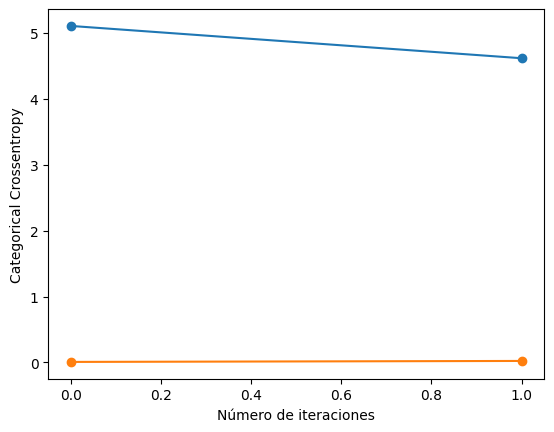

In [30]:
# Podemos plotear la loss para ver como entrena a traves de las epocas
plt.plot(history.history['loss'],'o-')
plt.xlabel('Número de iteraciones')
plt.ylabel('Categorical Crossentropy')

# Podemos plotear la accuracy tambien
plt.plot(history.history['accuracy'],'o-')
plt.xlabel('Número de iteraciones')
plt.ylabel('Categorical Crossentropy')

In [31]:
y_test_cat = to_categorical(y_test)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print('Porcentaje de acierto sobre datos de entrenamiento: ', accuracy_score(y_train, np.argmax(pred_train, axis=1)))
print('Porcentaje de acierto sobre datos de validación: ', accuracy_score(y_test, np.argmax(pred_test, axis=1)))

24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step
Porcentaje de acierto sobre datos de entrenamiento:  0.06334231805929919
Porcentaje de acierto sobre datos de validación:  0.056451612903225805


Luego de todas estas modificaciones, ¿como compara este rendimiento con el de los modelos simples sobre los datos precomputados?

## Ej 2
### Redes Neuronales recurrentes para clasificacion de datos con dependencia temporal

Como vimos en clase, asi como se recomiendan las redes convolucionales para imagenes y datos donde la espacialidad es relevante, para datos donde la dependencia temporal es importante existen un tipo de redes llamadas redes neuronales recurrentes. En este ultimo ejercicio, veremos como aplicar un tipo de RNN (Recurrent Neural Networks) muy popular, llamado LSTM (Long Short Term Memory).


Importamos los datos con una función de Keras, que ya tiene algunos pasos previos de modelado (que hicimos a mano en el último taller) automatizados.

In [34]:
max_features = 20000  # Solo consideramos las primeras 20mil palabras (ordenadas por frecuencia de uso)
maxlen = 200  # Y solo tomamos las primeras 200 palabras de cada reseña

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Secuencias de entrenamiento")
print(len(x_val), "de validación")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000 Secuencias de entrenamiento
25000 de validación


In [35]:
inputs = keras.Input(shape=(None,), dtype="int32")
# Una capa de embedding buscará ser una representación condensada
x = layers.Embedding(max_features, 128)(inputs)
# Agregamos unas capas bidireccionales LSTMs
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Y por ultimo una capa densa que lo lleve a una salida categorica
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()


Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, None, 128)      │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, None, 256)      │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, None, 128)      │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,086,465 (11.77 MB)

 Trainable params: 3,086,465 (11.77 MB)

 Non-trainable params: 0 (0.00 B)

Las capas bidireccionales utilizan informacion previa y futura en cada instante de evaluacion de una frase. ¿Porque sera necesario esto y cuando podria no serlo?

Antes de entrenar, podemos observar un poco mas los datos para refrescar de que se trataban, y ver como quedan con la "limpieza" que le aplica keras.

In [36]:
index = keras.datasets.imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in x_train[0]] )
print(decoded) 

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it

In [37]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=16, epochs=6, validation_data=(x_val, y_val))

Epoch 1/6
  31/1563 ━━━━━━━━━━━━━━━━━━━━ 7:09 280ms/step - accuracy: 0.5372 - loss: 0.6937

KeyboardInterrupt: 

In [ ]:
# Ploteamos loss y accuracy
plt.plot(history.history['loss'],'o-')
plt.xlabel('Número de iteraciones')
plt.ylabel('Categorical Crossentropy')

plt.plot(history.history['accuracy'],'o-')
plt.xlabel('Número de iteraciones')
plt.ylabel('Categorical Crossentropy')

¿Como compara esto con el modelo del taller anterior? Prueben cambiar parametros para ver si se puede hacer que mejore aun mas!